In [1]:
%matplotlib notebook
from scipy.stats import rv_continuous
from scipy.interpolate import interp1d
from scipy.special import gamma
import numpy as np
import emcee
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import exp, sqrt
from scipy.integrate import quad, dblquad
import matplotlib.patches as patches
from itertools import product
from scipy.integrate import quad
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
import lmfit
from py_unsio import *
import pymc
import os
from pymodelfit import FunctionModel1DAuto
import wkbl
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()
import iminuit
from iminuit import Minuit, describe, Struct
import probfit
from matplotlib.colors import LogNorm

In [2]:
path = "/data/OWN/HR_Turbach/output_00030"
myhalo = wkbl.Galaxy_Hound(path,"halo,gas,stars",getcen=False)

loading Dark matter..
loading Stars..
loading Gas..


In [3]:
cen = nbe.real_center(myhalo.st.pos3d,myhalo.st.mass)
myhalo.center_shift(cen)

myhalo.r_virial(600)

| r_200 = 500.9765625
---- taking particles inside 2.5 * r200
| number of praticles inside 2.5 * r200 
| dm mass       =  5.443e+13 M_sun
| p_dm_200      =  1.192e+06 particles
| stellar mass  =  1.211e+11 M_sun
| p_st_200      =  4.868e+06 psrticles
| gas mass      =  9.101e+12 M_sun
| p_gs_200      =  8.047e+06 particles
---- rotating galaxy 
| Diagonal matrix computed 
|    |19, 0, 0|
| D =| 0, 8, 0|
|    | 0, 0, 2|


In [4]:
print cen
nucenter = nbe.real_center(myhalo.dm.pos3d[(myhalo.dm.r<50.)], myhalo.dm.mass[(myhalo.dm.r<50.)])
print nucenter
myhalo.center_shift(nucenter)
myhalo.redefine(4.5)

[ 175.01682688  570.27982483  319.07950174]
[ 0.38018624 -0.3531517   0.02306364]


In [5]:
ok,myhalo.dm.rho,_= CF.getDensity(np.array(myhalo.dm.pos3d.reshape(len(myhalo.dm.pos3d)*3),
                                    dtype=np.float32), myhalo.dm.mass)

In [6]:
def face_on_st(sim,lims,points,thikness=.5):
    disk = (np.abs(sim.st.pos3d[:,2])<thikness)
    edges = np.linspace(lims[0],lims[1],points)
    H, xedges, yedges = np.histogram2d(sim.st.pos3d[disk,0], 
                                       sim.st.pos3d[disk,1],
                                       bins=(edges, edges),
                                       weights=sim.st.mass[disk])
    result = H.T
    return result, edges

<IPython.core.display.Javascript object>


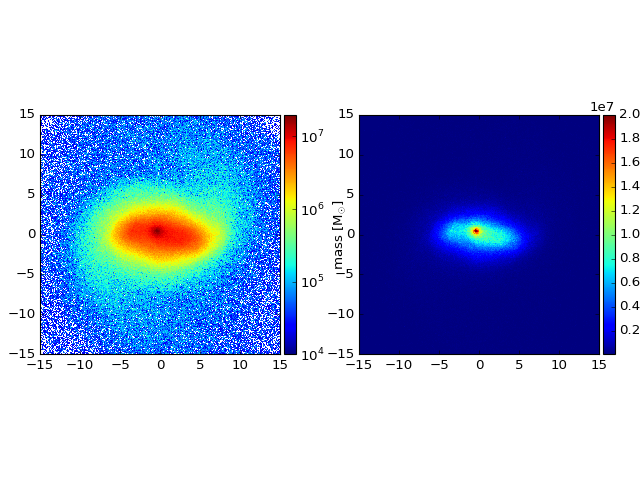

In [30]:
faceon, edges = face_on_st(myhalo,[-15,15],370,thikness=2)

fig,[ax,ax1] = plt.subplots(1,2)
fig.tight_layout(w_pad=2)

mass_1 = ax.imshow(faceon, interpolation='nearest', origin='low',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e4,vmax=2e7)
                  )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_1,cax=cax,label=r'mass [M$_{\odot}$]')

mass_1 = ax1.imshow(faceon, interpolation='nearest', origin='low',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                    vmin=1e4,vmax=2e7
                  )
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_1,cax=cax,label=r'mass [M$_{\odot}$]')


In [10]:
path = "/data/OWN/BALLSF0/output_00024"
haloSF0= wkbl.Galaxy_Hound(path,"halo,gas,stars",getcen=False)

loading Dark matter..
loading Stars..
loading Gas..


In [11]:
cen = haloSF0.dm.Clumps.pos3d[haloSF0.dm.Clumps.cell==haloSF0.dm.Clumps.cell.max()]
haloSF0.center_shift(cen)

haloSF0.r_virial(600)

| r_200 = 222.0703125
---- taking particles inside 2.5 * r200
| number of praticles inside 2.5 * r200 
| dm mass       =  1.617e+12 M_sun
| p_dm_200      =  1.040e+06 particles
| stellar mass  =  5.837e+10 M_sun
| p_st_200      =  2.512e+05 psrticles
| gas mass      =  2.445e+11 M_sun
| p_gs_200      =  3.133e+06 particles
---- rotating galaxy 
| Diagonal matrix computed 
|    |17, 0, 0|
| D =| 0,12, 0|
|    | 0, 0, 2|


In [12]:
nucenter = nbe.real_center(haloSF0.dm.pos3d, haloSF0.dm.mass)
haloSF0.center_shift(nucenter)
haloSF0.redefine(4.5)

In [13]:
ok,haloSF0.dm.rho,_= CF.getDensity(np.array(haloSF0.dm.pos3d.reshape(len(haloSF0.dm.pos3d)*3),
                                    dtype=np.float32), haloSF0.dm.mass)

<IPython.core.display.Javascript object>


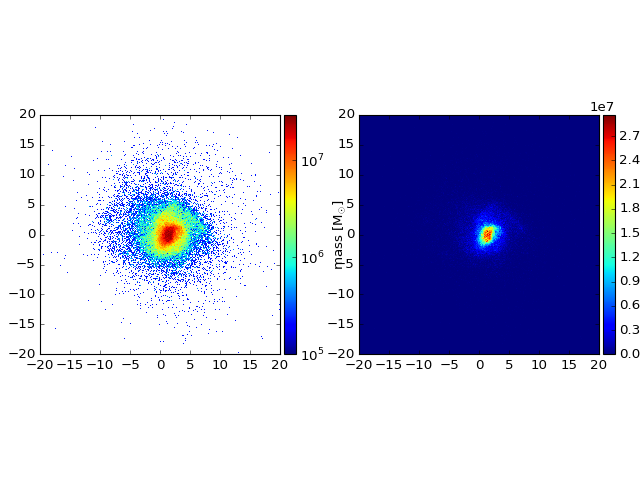

In [31]:
faceon, edges = face_on_st(haloSF0,[-20,20],270,thikness=.2)

fig,[ax,ax1] = plt.subplots(1,2)
fig.tight_layout(w_pad=2)

mass_1 = ax.imshow(faceon, interpolation='nearest', origin='low',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e5)
                  )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_1,cax=cax,label=r'mass [M$_{\odot}$]')

mass_1 = ax1.imshow(faceon, interpolation='nearest', origin='low',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                    vmin=1e-5
                  )
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_1,cax=cax,label=r'mass [M$_{\odot}$]')

In [15]:
print "z = {0}".format((1./myhalo.p.aexp) - 1)

z = 0.379249002853


In [36]:
path = "/data/OWN/BALL/Mochima2lv17_tdis140/output_00041"
haloSF1= wkbl.Galaxy_Hound(path,"halo,gas,stars",getcen=False)

loading Dark matter..
loading Stars..
loading Gas..


In [37]:
cen = haloSF1.dm.Clumps.pos3d[haloSF1.dm.Clumps.cell==haloSF1.dm.Clumps.cell.max()]
haloSF1.center_shift(cen)

haloSF1.r_virial(600)

| r_200 = 230.2734375
---- taking particles inside 2.5 * r200
| number of praticles inside 2.5 * r200 
| dm mass       =  1.439e+12 M_sun
| p_dm_200      =  9.271e+05 particles
| stellar mass  =  4.683e+10 M_sun
| p_st_200      =  1.772e+06 psrticles
| gas mass      =  2.254e+11 M_sun
| p_gs_200      =  2.257e+06 particles
---- rotating galaxy 
| Diagonal matrix computed 
|    |18, 0, 0|
| D =| 0,10, 0|
|    | 0, 0, 1|


In [38]:
nucenter = nbe.real_center(haloSF1.dm.pos3d, haloSF1.dm.mass)
haloSF1.center_shift(nucenter)
haloSF1.redefine(4.5)

<IPython.core.display.Javascript object>


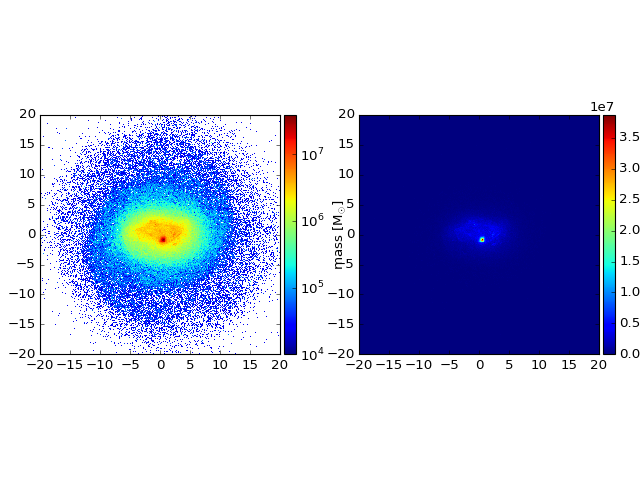

In [46]:
faceon, edges = face_on_st(haloSF1,[-20,20],270,thikness=.2)

fig,[ax,ax1] = plt.subplots(1,2)
fig.tight_layout(w_pad=2)

mass_1 = ax.imshow(faceon, interpolation='nearest', origin='low',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                   norm=LogNorm(vmin=1e4)
                  )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_1,cax=cax,label=r'mass [M$_{\odot}$]')

mass_1 = ax1.imshow(faceon, interpolation='nearest', origin='low',
                   extent=[edges[0], edges[-1], edges[0], edges[-1]],
                    vmin=-1000
                  )
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(mass_1,cax=cax,label=r'mass [M$_{\odot}$]')